In [ ]:
import pandas as pd
import numpy as np

iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


menghilangkan kolom 'id', karena kolom tersebut tidak digunakan

In [ ]:
iris.drop('Id', axis=1, inplace=True)

# EDA

In [ ]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


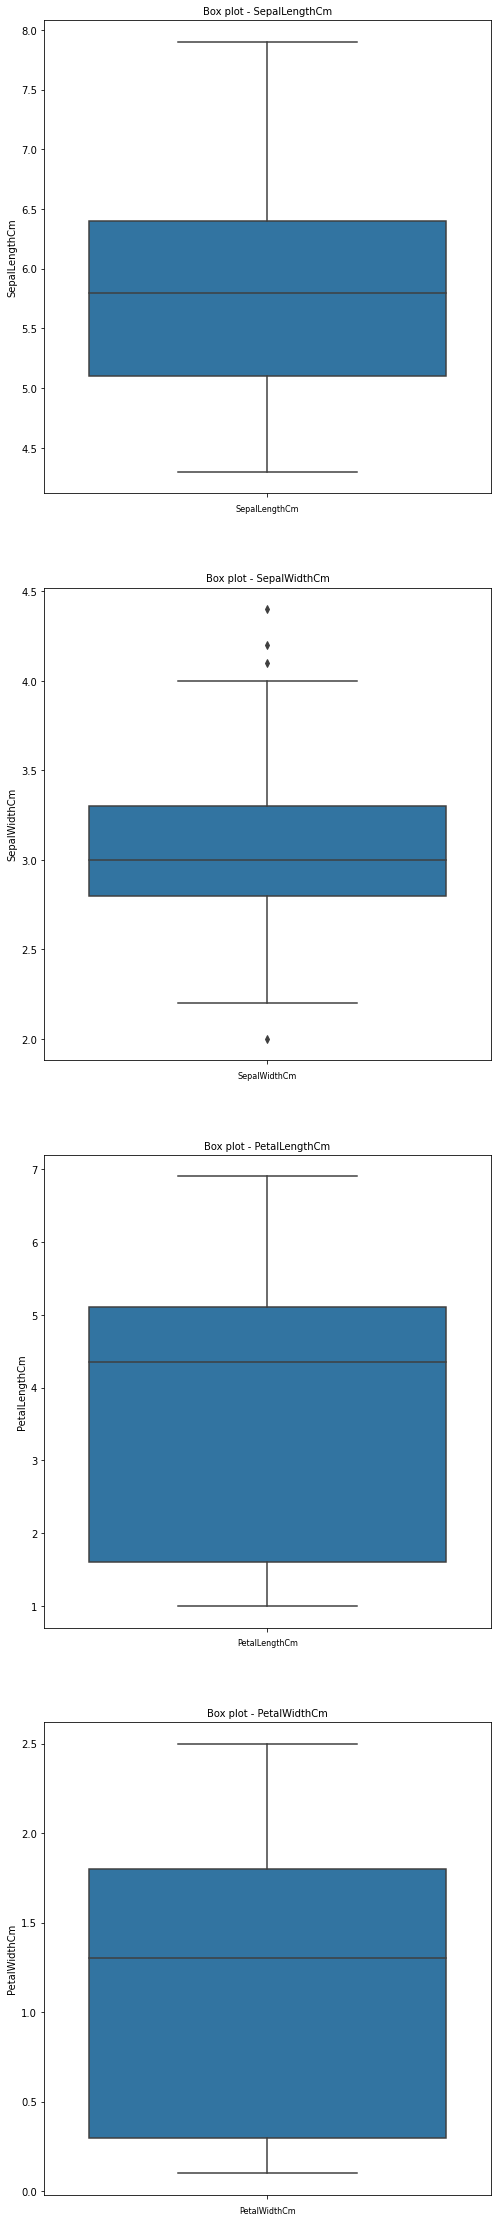

In [ ]:
#outlier detection
import matplotlib.pyplot as plt
import seaborn as sns

col_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=iris[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

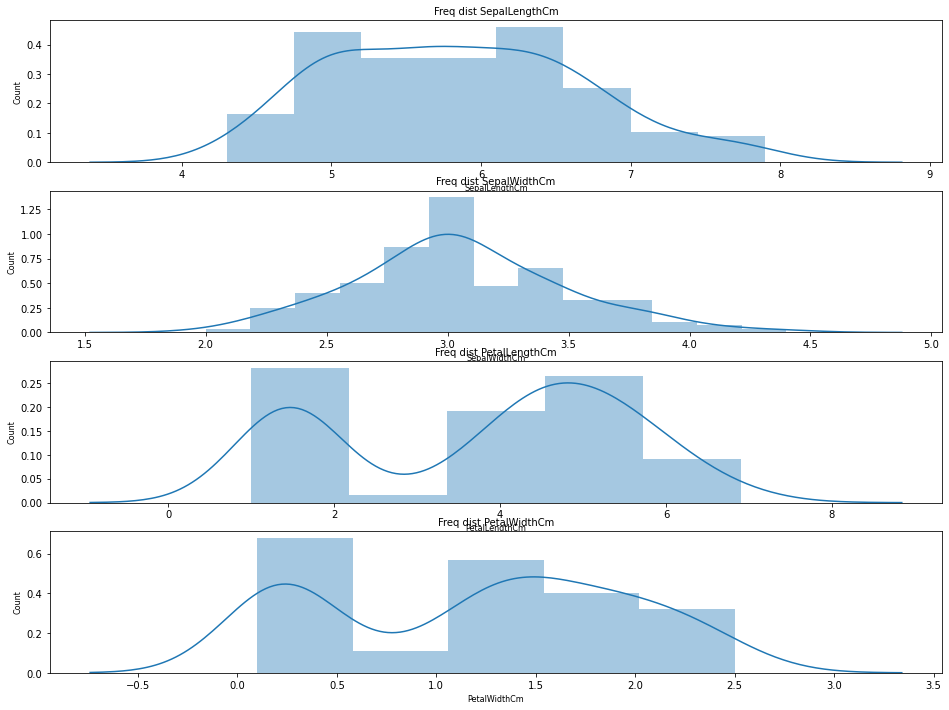

In [ ]:
#the estimated pdf of data
fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(iris[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

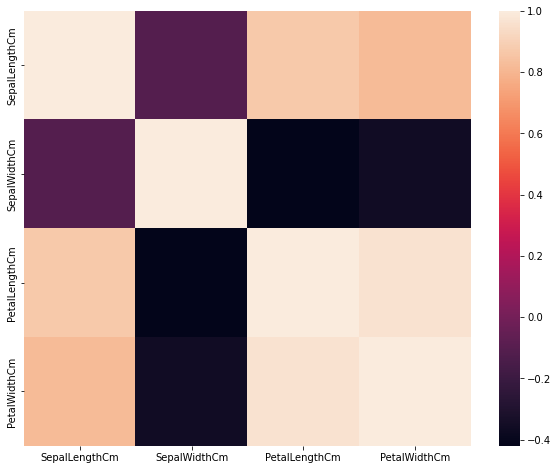

In [ ]:
#the correlation matrix
f,ax = plt.subplots(figsize=(10, 8))
corr = iris.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

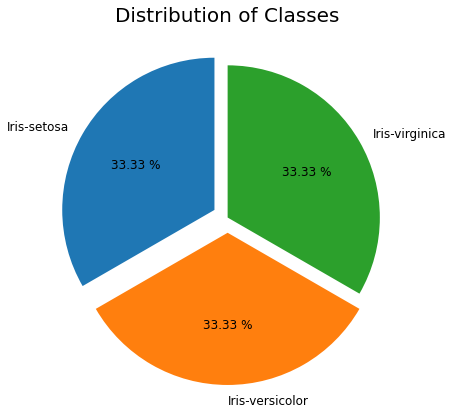

In [ ]:
count_list = [(iris.Species == 'Iris-setosa').sum(), (iris.Species == 'Iris-versicolor').sum(), (iris.Species == 'Iris-virginica').sum()]
label_list = list(iris['Species'].unique())
plt.figure(figsize = (10,7))
plt.pie(count_list, labels = label_list, autopct = "%.2f %%", startangle = 90, explode = (0.1, 0.1, 0.0), textprops = {'fontsize': 12})
plt.title('Distribution of Classes', fontsize = 20)
plt.show()

In [ ]:
#check missing value
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

mendefinisikan variabel x dan y

In [ ]:
x= iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris[['Species']]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()
x = scaler.fit_transform(x)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

membagi dataset menjadi data uji dan data latih, dengan perbandingan 90:10

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=123)

membuat dan melakukan pelatihan model

In [ ]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(x_train, y_train)

evaluasi model

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(x_test)
acc_score= round(accuracy_score(y_pred, y_test), 3)
print('accuracy: ', acc_score)

accuracy:  0.867


berdasarkan model yang terbentuk, maka kita bisa memprediksi species dari sebuah bunga iris, dengan cara menggunakan data 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' dari bunga tersebut.

In [ ]:
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

#0 = Iris-setosa
#1 = Iris-versicolor
#2 = Iris-virginica

2


serta kita juga bisa melihat visualisasi dari decision tree yang kita buat terhadap data menggunakan **library Graphviz**.

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

code diatas menghasilkan file dengan format .dot, apabila ingin mengkonversi file tersebut kedalam bentuk .png, dapat menggunakan [link ini](https://onlineconvertfree.com/converter/images/).

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_predlr = lr.predict(x_test)
acc_lr = lr.score(x_test, y_test)
print('The accuracy for Logistic Regression is : ', acc_lr*100, '%')

The accuracy for Logistic Regression is :  100.0 %


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC()
svm.fit(x_train, y_train)
y_predsvm = svm.predict(x_test)
acc_svm= accuracy_score(y_predsvm, y_test)
print('The accuracy for SVM is : ', acc_svm*100, '%')

The accuracy for SVM is :  93.33333333333333 %
